**⭐️ IMAGE CLASSIFICATION**

In [44]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [69]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root="./cifar", download=True, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True)

testset = torchvision.datasets.CIFAR10(root="./cifar", download=True, train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=16, shuffle=True)


Files already downloaded and verified
Files already downloaded and verified


**⭐️ NETWORK**

In [71]:
import torch.nn.functional as F

class MyCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        
model = MyCNN()

In [72]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

MyCNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

**⭐️ TRAIN**

In [ ]:
for epoch in range(100):
    for i, data in enumerate(train_loader):
        inputs, labels = data
        optimizer.zero_grad()
        output = model(inputs.to(device))
        loss = criterion(output, labels.to(device))
        loss.backward()
        optimizer.step()
        if i%100==0:
            print(f"LOSS : {loss.item()}")
    print(f"EPOCH : {epoch+1} LOSS: {loss.item()}")

**⭐️ TEST**

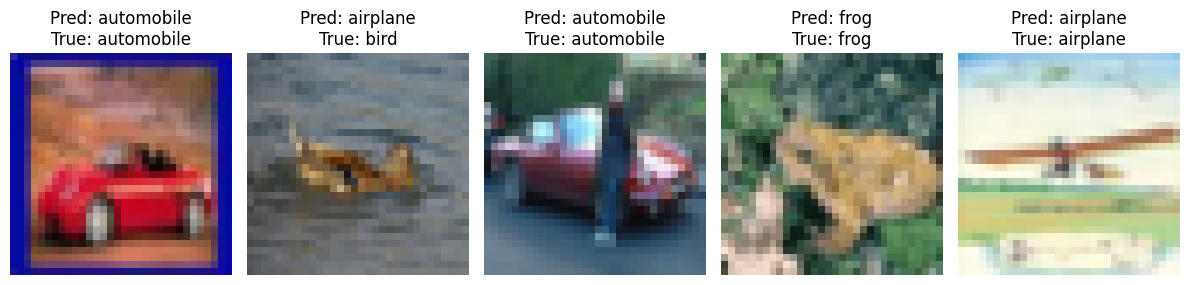

In [78]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))

classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

data_iter = iter(test_loader)
images, labels = next(data_iter)
images, labels = images[:5], labels[:5]
images = images.to(device)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

predicted = predicted.cpu()
labels = labels.cpu()

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    imshow(images[i].cpu())
    plt.title(f"Pred: {classes[predicted[i]]}\nTrue: {classes[labels[i]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
